# UK Python Users

## Data Source

This is an analysis of the **2019 StackOverflow survey** data, available [here](https://insights.stackoverflow.com/survey).

The data includes information about StackOverflow users from across the world, including demographics, primary programming languages, salaries and more.

This analysis looks only at **UK** users who use **Python** and are **employed full time**.

The code to analyse the data and produce the charts is hidden by default but you can **view the code** by clicking on the `Show Code` button at the top left of the page.

In [43]:
import numpy as np

import pandas as pd

# Show a chart created using matplotlib directly under the code that produces it
%matplotlib inline

# Import pyplot from the matplotlib library, for creating charts
from matplotlib import pyplot as plt

# Configure the aesthetics of the charts
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['figure.frameon'] = False
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['savefig.facecolor'] = '#FFFFFF'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['ytick.major.pad']='4'
plt.rcParams['xtick.major.pad']='4'
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 10

# Read in the csv of the global data into a dataframe called s
s = pd.read_csv('survey_results_public.csv')

## Overview

In [44]:
# Create a new dataframe, p_uk, containing responses from UK users who use Python
# and are employed full time.
p_uk = s.loc[ 
    (s['Country']=='United Kingdom') &
    (s['LanguageWorkedWith'].str.contains('Python') &
    (s['Employment']=='Employed full-time'))
]

In [45]:
# How many UK Python users (employed full time) responded to the survey?
str(len(p_uk)) + ' UK Python users employed full time (' + str(round(len(p_uk)/len(s)*100, 2)) + '% of all survey respondents) responded to the survey'

'1772 UK Python users employed full time (1.99% of all survey respondents) responded to the survey'

## Languages

In [46]:
# Separate each 'LanguageWorkedWith' value into a list of words, 
# by splitting where there is a semi-colon
lang_lists = p_uk['LanguageWorkedWith'].str.split(";")

# Create an empty list called lang_col, that will be used to
# store one language per row in the subsequent 'for' loop
lang_col = []

# loop through each row, and each element in the list in each row,
# and add the language in each element to the lang_col list
for row in lang_lists:
    for element in row:
        lang_col.append(element)

# change the lang_col series into a dataframe
lang_col_df = pd.DataFrame(lang_col)

# Rename the column from '0' to 'Language'
lang_col_df.columns=['Language']

The top 3 languages (in addition to Python) used by UK Python users who are employed full-time are:

In [47]:
top_langs = lang_col_df['Language'].value_counts().head(4)
top_langs = pd.DataFrame(top_langs)
top_langs.columns=['Users']
top_langs[1:]

,Users
JavaScript,1177
HTML/CSS,1086
Bash/Shell/PowerShell,1021


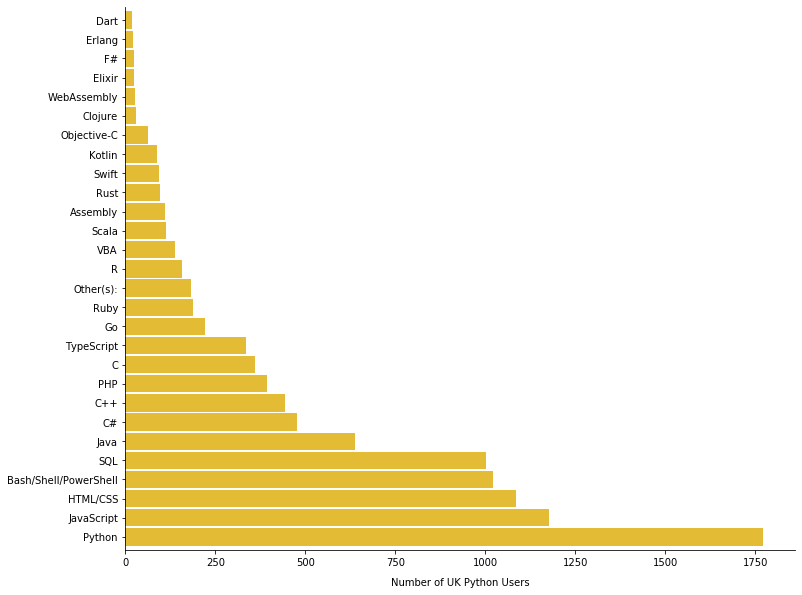

In [48]:
# Count the frequency of each language and plot the frequencies in 
# a horizontal bar plot
lang_col_df['Language'].value_counts().plot.barh(color='#deaa02', alpha=0.8, width=0.9);
plt.xlabel('Number of UK Python Users');

## Employment

In [49]:
# How are UK Python users using code? Are they professional 
# developers / use code as part of their work or something else?

# Create new dataframe of UK python users (who are employed full time) roles (DevTypes)
# where there is no missing value
devtypes_notmissing = pd.DataFrame(p_uk.loc[p_uk['DevType'].notnull(), 'DevType'])

# Separate each 'DevType' value into a list of words, 
# by splitting where there is a semi-colon
devtype_lists = devtypes_notmissing['DevType'].str.split(";")


# Create an empty list called devtype_col, that will be used to
# store one role per row in the subsequent 'for' loop
devtype_col = []

# loop through each row, and each element in the list in each row,
# and add the role in each element to the devtype_col list
for row in devtype_lists:
    for element in row:
        devtype_col.append(element)

# change the devtype_col series into a dataframe
devtype_col_df = pd.DataFrame(devtype_col)

# Rename the column from '0' to 'Role'
devtype_col_df.columns=['Role']

The top 3 roles of UK Python users who are employed full-time are:

In [50]:
top_roles = devtype_col_df['Role'].value_counts().head(3)
top_roles = pd.DataFrame(top_roles)
top_roles.columns=['Users']
top_roles

,Users
"Developer, full-stack",829
"Developer, back-end",800
"Developer, front-end",372


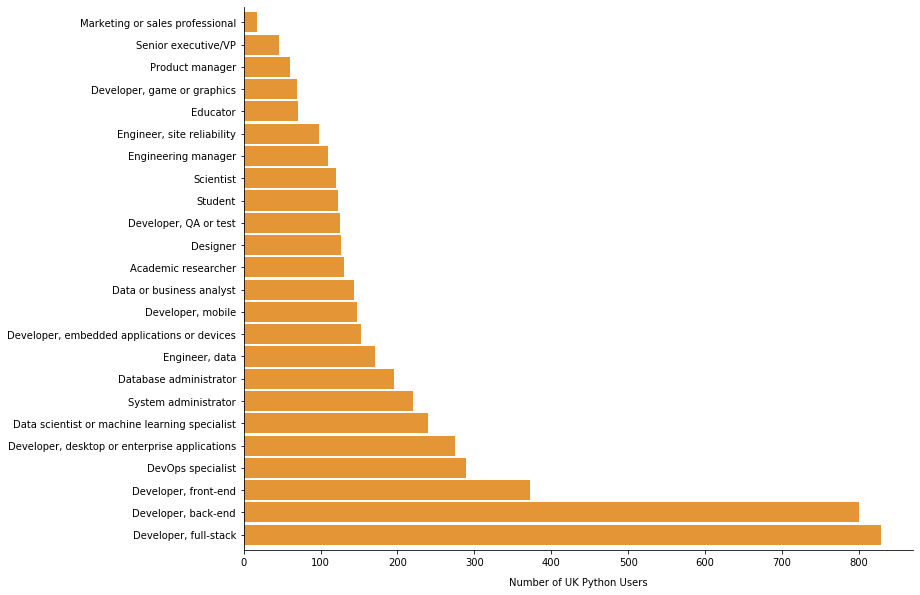

In [51]:
# Count the frequency of each role and plot the frequencies in 
# a horizontal bar plot
devtype_col_df['Role'].value_counts().plot.barh(color='#de7b02', alpha=0.8, width=0.9);
plt.xlabel('Number of UK Python Users');

## Gender

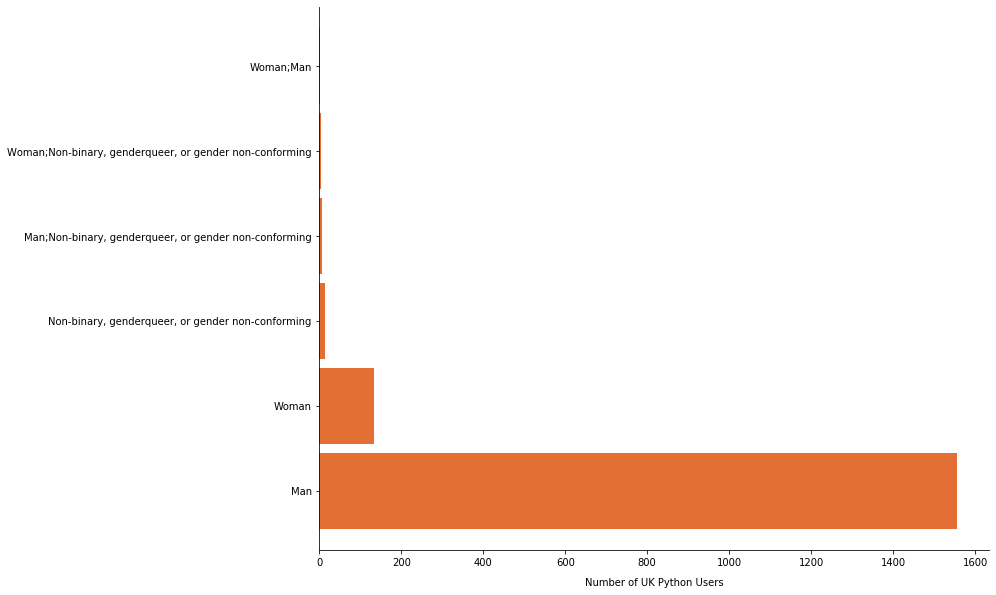

In [52]:
p_uk['Gender'].value_counts().plot.barh(color='#de4b02', alpha=0.8, width=0.9);
plt.xlabel('Number of UK Python Users');

## Age

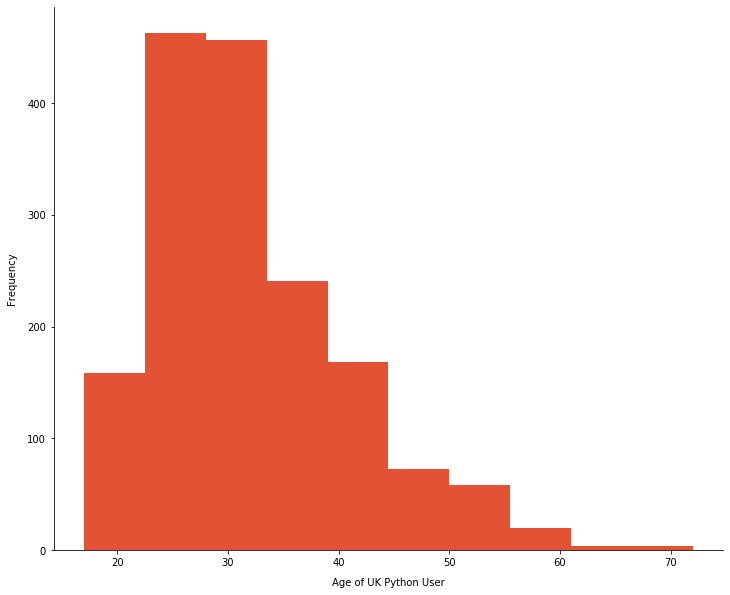

In [53]:
p_uk['Age'].plot.hist(color='#de2702', alpha=0.8);
plt.xlabel('Age of UK Python User');

## Education

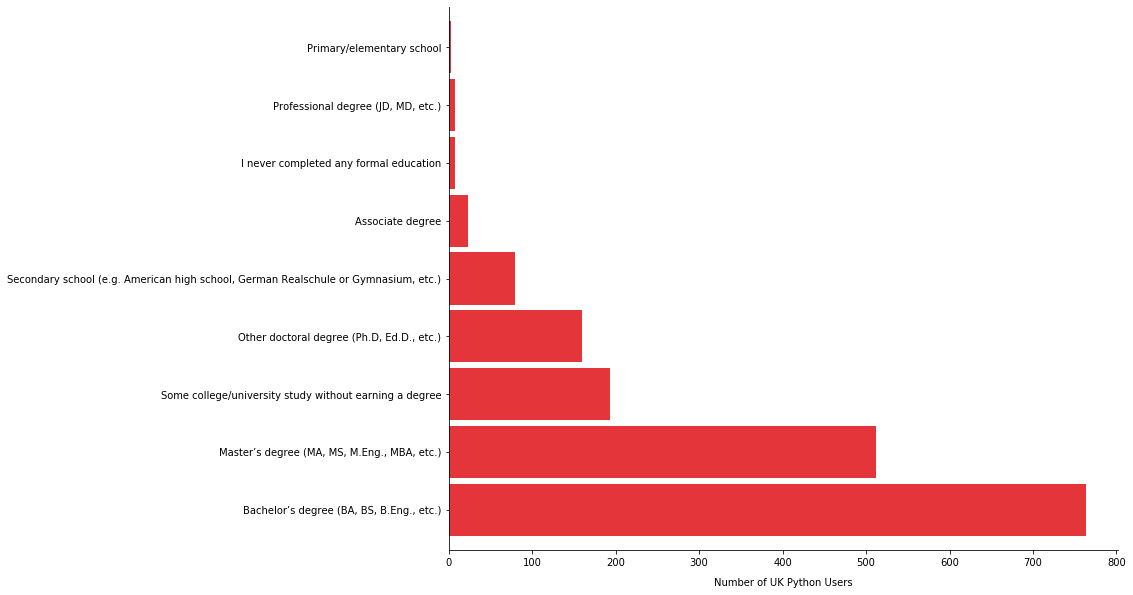

In [54]:
p_uk['EdLevel'].value_counts().plot.barh(color='#de0209', alpha=0.8, width=0.9);
plt.xlabel('Number of UK Python Users');

## Salary

In [55]:
p_uk_GBP_salaries = p_uk.loc[(p_uk['CompTotal'].notnull()) & (p_uk['CurrencySymbol']=='GBP') ]
'The median salary paid in GBP for UK Python users employed full time is ' + str(round(p_uk_GBP_salaries['CompTotal'].median()))

'The median salary paid in GBP for UK Python users employed full time is 45000'

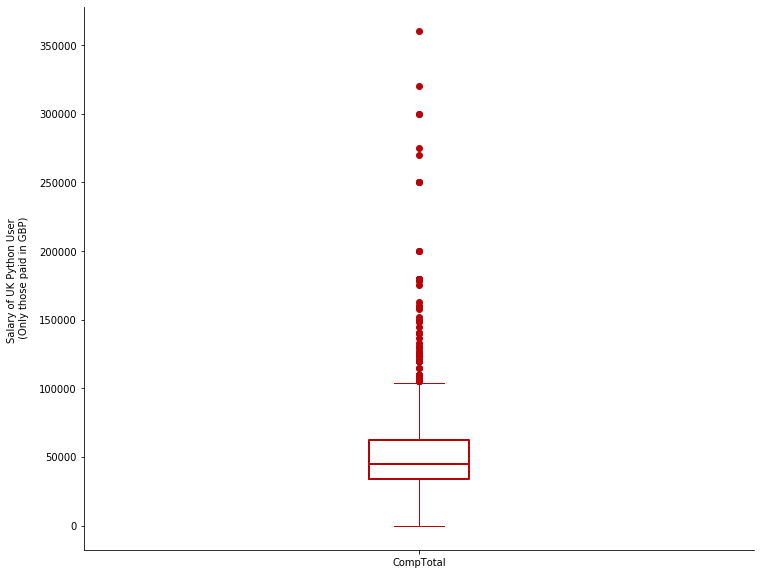

In [56]:
p_uk_GBP_salaries['CompTotal'].plot.box(color='#b80208', 
                                        boxprops = dict(linestyle='-', linewidth=2, color='#b80208'),
                                        medianprops = dict(linestyle='-', linewidth=2, color='#b80208'),
                                        flierprops = dict(marker='o', markerfacecolor='#b80208', 
                                                          markeredgecolor='#b80208', markersize=6, linestyle='none')
                                       );
plt.ylabel('Salary of UK Python User \n (Only those paid in GBP)');